# WeatherPy

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import uniform
from scipy.stats import linregress
import requests
import json
from pprint import pprint
import gmaps
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key

## Generate Cities List

In [10]:
# Generate a list of coordinates to create a cities list 
## Question 1: I think there should be a more straightforward way to get this list.
cities_list = []
def newpoint():
    return uniform(-180,180), uniform(-90, 90)

coords = (newpoint() for x in range(1500))
for point in coords:
    #print (point)
    for city in point:
        city = citipy.nearest_city(uniform(-180,180), uniform(-90, 90))
        #print(city)
        cities_list.append(city.city_name.capitalize())
print(cities_list)
print(f"City number is {len(cities_list)}.")

['Barentsburg', 'Indija', 'Ushuaia', 'Bhatkal', 'Belushya guba', 'Ushuaia', 'Longyearbyen', 'Belushya guba', 'Hermanus', 'Luebo', 'Bredasdorp', 'Ushuaia', 'Barentsburg', 'Ushuaia', 'Port elizabeth', 'Hithadhoo', 'Hermanus', 'Benguela', 'Vajszlo', 'Ushuaia', 'Cape town', 'Illoqqortoormiut', 'Belushya guba', 'Port alfred', 'Barentsburg', 'Qaanaaq', 'Vardo', 'Ushuaia', 'Ushuaia', 'Ushuaia', 'Kavaratti', 'Qaanaaq', 'Ushuaia', 'Dikson', 'Dikson', 'Chabahar', 'Banda aceh', 'Illoqqortoormiut', 'Grand gaube', 'Skjervoy', 'Ushuaia', 'Port alfred', 'Morondava', 'Surgana', 'Illoqqortoormiut', 'Hithadhoo', 'Dikson', 'Qaanaaq', 'Bredasdorp', 'Castleblayney', 'Longyearbyen', 'Huarmey', 'Grindavik', 'Ilam', 'Ushuaia', 'Port alfred', 'Chik', 'Port alfred', 'Punta arenas', 'Trento', 'Hermanus', 'Hermanus', 'Bredasdorp', 'Longyearbyen', 'Barentsburg', 'Port elizabeth', 'Ushuaia', 'Qaanaaq', 'Dikson', 'Ushuaia', 'Barentsburg', 'Belushya guba', 'Razole', 'Ushuaia', 'Bredasdorp', 'Belushya guba', 'Barentsb

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [11]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [12]:
# set up lists to hold reponse info
name =[]
lat = []
lng =[]
temp = []
hum =[]
cloud =[]
wind =[]
country= []
date =[]
# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("=============================")

for city in cities_list:
    response = requests.get(query_url + city).json()
    try:   
        print(f"Processing Record of {city}")
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        print("City not found. Skipping...")
        pass

print("=============================")
print("Data Retrieval Complete")
print("=============================")

Beginning Data Retrieval
Processing Record of Barentsburg
City not found. Skipping...
Processing Record of Indija
Processing Record of Ushuaia
Processing Record of Bhatkal
Processing Record of Belushya guba
City not found. Skipping...
Processing Record of Ushuaia
Processing Record of Longyearbyen
Processing Record of Belushya guba
City not found. Skipping...
Processing Record of Hermanus
Processing Record of Luebo
Processing Record of Bredasdorp
Processing Record of Ushuaia
Processing Record of Barentsburg
City not found. Skipping...
Processing Record of Ushuaia
Processing Record of Port elizabeth
Processing Record of Hithadhoo
Processing Record of Hermanus
Processing Record of Benguela
Processing Record of Vajszlo
Processing Record of Ushuaia
Processing Record of Cape town
Processing Record of Illoqqortoormiut
City not found. Skipping...
Processing Record of Belushya guba
City not found. Skipping...
Processing Record of Port alfred
Processing Record of Barentsburg
City not found. Skip

Processing Record of Dikson
Processing Record of Talnakh
Processing Record of Albany
Processing Record of Longyearbyen
Processing Record of Panama city
Processing Record of Taolanaro
City not found. Skipping...
Processing Record of Chuy
Processing Record of Macduff
Processing Record of Bredasdorp
Processing Record of Port alfred
Processing Record of Praia
Processing Record of Bredasdorp
Processing Record of Dikson
Processing Record of Albany
Processing Record of Port elizabeth
Processing Record of Belushya guba
City not found. Skipping...
Processing Record of Barentsburg
City not found. Skipping...
Processing Record of Araguacu
Processing Record of Port elizabeth
Processing Record of Longyearbyen
Processing Record of Ugljevik
Processing Record of Dikson
Processing Record of Ushuaia
Processing Record of Ushuaia
Processing Record of Barentsburg
City not found. Skipping...
Processing Record of Taolanaro
City not found. Skipping...
Processing Record of Ushuaia
Processing Record of Port eli

Processing Record of Upernavik
Processing Record of Cape town
Processing Record of Belushya guba
City not found. Skipping...
Processing Record of Ushuaia
Processing Record of Saint-philippe
Processing Record of Cimitarra
Processing Record of Kruisfontein
Processing Record of Ambikapur
Processing Record of Port elizabeth
Processing Record of Ushuaia
Processing Record of Barentsburg
City not found. Skipping...
Processing Record of Klaksvik
Processing Record of Bredasdorp
Processing Record of Port alfred
Processing Record of Umm kaddadah
Processing Record of Taolanaro
City not found. Skipping...
Processing Record of Chivilcoy
Processing Record of Narsaq
Processing Record of Longyearbyen
Processing Record of Ushuaia
Processing Record of Longyearbyen
Processing Record of Longyearbyen
Processing Record of Arraial do cabo
Processing Record of Ushuaia
Processing Record of Salinas
Processing Record of Chateauneuf-les-martigues
Processing Record of Ushuaia
Processing Record of Taolanaro
City not

Processing Record of Narsaq
Processing Record of Mahebourg
Processing Record of Ushuaia
Processing Record of Ushuaia
Processing Record of Takoradi
Processing Record of Tabas
Processing Record of Port alfred
Processing Record of Saint george
Processing Record of Hambantota
Processing Record of Qaanaaq
Processing Record of Souillac
Processing Record of Cape town
Processing Record of Belushya guba
City not found. Skipping...
Processing Record of Ushuaia
Processing Record of Ormara
Processing Record of Cape town
Processing Record of Illoqqortoormiut
City not found. Skipping...
Processing Record of Bredasdorp
Processing Record of Longyearbyen
Processing Record of Ushuaia
Processing Record of Formoso do araguaia
City not found. Skipping...
Processing Record of Punta arenas
Processing Record of Saldanha
Processing Record of Humberto de campos
Processing Record of Arraial do cabo
Processing Record of Bereda
Processing Record of Illoqqortoormiut
City not found. Skipping...
Processing Record of 

Processing Record of Ushuaia
Processing Record of Ushuaia
Processing Record of Manicore
Processing Record of Albany
Processing Record of Belushya guba
City not found. Skipping...
Processing Record of Olafsvik
Processing Record of Iqaluit
Processing Record of Chuy
Processing Record of Tasbuget
City not found. Skipping...
Processing Record of Qaanaaq
Processing Record of Qaanaaq
Processing Record of Port alfred
Processing Record of Qaanaaq
Processing Record of Port elizabeth
Processing Record of Busselton
Processing Record of Port alfred
Processing Record of Bredasdorp
Processing Record of Bredasdorp
Processing Record of Qaanaaq
Processing Record of East london
Processing Record of Ushuaia
Processing Record of Dikson
Processing Record of Bredasdorp
Processing Record of Barentsburg
City not found. Skipping...
Processing Record of Dikson
Processing Record of Qaanaaq
Processing Record of Port elizabeth
Processing Record of Clyde river
Processing Record of Hermanus
Processing Record of Longy

Processing Record of Ushuaia
Processing Record of Dikson
Processing Record of Dikson
Processing Record of Longyearbyen
Processing Record of Port elizabeth
Processing Record of Barentsburg
City not found. Skipping...
Processing Record of Longyearbyen
Processing Record of Bredasdorp
Processing Record of Punta arenas
Processing Record of Upernavik
Processing Record of Malindi
Processing Record of Barentsburg
City not found. Skipping...
Processing Record of Ushuaia
Processing Record of Qaanaaq
Processing Record of Ushuaia
Processing Record of Illoqqortoormiut
City not found. Skipping...
Processing Record of Manoel urbano
Processing Record of Bossembele
City not found. Skipping...
Processing Record of Dikson
Processing Record of Ushuaia
Processing Record of Tasiilaq
Processing Record of Belushya guba
City not found. Skipping...
Processing Record of Illoqqortoormiut
City not found. Skipping...
Processing Record of Qaanaaq
Processing Record of Port elizabeth
Processing Record of Sozimskiy
Pro

Processing Record of Soyo
Processing Record of Jamestown
Processing Record of Ushuaia
Processing Record of Port elizabeth
Processing Record of Ushuaia
Processing Record of Dikson
Processing Record of Sonqor
Processing Record of Saldanha
Processing Record of Cape town
Processing Record of Port alfred
Processing Record of Dikson
Processing Record of Ushuaia
Processing Record of Dikson
Processing Record of Dikson
Processing Record of Harper
Processing Record of Belmonte
Processing Record of Ushuaia
Processing Record of Belushya guba
City not found. Skipping...
Processing Record of Bredasdorp
Processing Record of Hermanus
Processing Record of Ushuaia
Processing Record of Dikson
Processing Record of Torbay
Processing Record of Illoqqortoormiut
City not found. Skipping...
Processing Record of Ushuaia
Processing Record of Ushuaia
Processing Record of Ilulissat
Processing Record of Mirante do paranapanema
Processing Record of Longyearbyen
Processing Record of Ushuaia
Processing Record of Illoq

Processing Record of Sao joao da barra
Processing Record of Meulaboh
Processing Record of Illoqqortoormiut
City not found. Skipping...
Processing Record of Margate
Processing Record of Hermanus
Processing Record of Caconda
Processing Record of Qaanaaq
Processing Record of Qaanaaq
Processing Record of Bredasdorp
Processing Record of Maniitsoq
Processing Record of Palma
Processing Record of Barentsburg
City not found. Skipping...
Processing Record of Baijiantan
Processing Record of Cape town
Processing Record of Ushuaia
Processing Record of Ushuaia
Processing Record of Illoqqortoormiut
City not found. Skipping...
Processing Record of Hermanus
Processing Record of Ushuaia
Processing Record of Victoria
Processing Record of Souillac
Processing Record of Upernavik
Processing Record of Ushuaia
Processing Record of Gualeguay
Processing Record of Beruwala
Processing Record of Albany
Processing Record of Ushuaia
Processing Record of Ushuaia
Processing Record of Honningsvag
Processing Record of P

Processing Record of Kruisfontein
Processing Record of Guaiuba
Processing Record of Cape town
Processing Record of Ribeira grande
Processing Record of Ponta do sol
Processing Record of Ushuaia
Processing Record of Dikson
Processing Record of Port alfred
Processing Record of Dikson
Processing Record of Dikson
Processing Record of Norrtalje
Processing Record of Ushuaia
Processing Record of Ushuaia
Processing Record of Ushuaia
Processing Record of Albany
Processing Record of Souillac
Processing Record of Belushya guba
City not found. Skipping...
Processing Record of Port alfred
Processing Record of Illoqqortoormiut
City not found. Skipping...
Processing Record of Qaanaaq
Processing Record of Burica
City not found. Skipping...
Processing Record of Dikson
Processing Record of Bredasdorp
Processing Record of Illoqqortoormiut
City not found. Skipping...
Processing Record of Mar del plata
Processing Record of Belushya guba
City not found. Skipping...
Processing Record of Ushuaia
Processing Rec

Processing Record of Ushuaia
Processing Record of Port elizabeth
Processing Record of Ilo
Processing Record of Bredasdorp
Processing Record of Taolanaro
City not found. Skipping...
Processing Record of East london
Processing Record of Dikson
Processing Record of Busselton
Processing Record of Ushuaia
Processing Record of Bulembu
Processing Record of Korla
Processing Record of Longyearbyen
Processing Record of Bredasdorp
Processing Record of Laguna
Processing Record of Fort-shevchenko
Processing Record of Ushuaia
Processing Record of Kibungo
Processing Record of Barentsburg
City not found. Skipping...
Processing Record of Albany
Processing Record of Nyuksenitsa
Processing Record of Muros
Processing Record of Maloshuyka
City not found. Skipping...
Processing Record of Hermanus
Processing Record of Ushuaia
Processing Record of Bereda
Processing Record of Narsaq
Processing Record of Dikson
Processing Record of Barentsburg
City not found. Skipping...
Processing Record of Barentsburg
City no

Processing Record of Bredasdorp
Processing Record of Ushuaia
Processing Record of Faya
Processing Record of Mar del plata
Processing Record of Arraial do cabo
Processing Record of Souillac
Processing Record of Saint george
Processing Record of Victoria
Processing Record of Mar del plata
Processing Record of Ardakan
Processing Record of Lagoa
Processing Record of Inderborskiy
City not found. Skipping...
Processing Record of Ilulissat
Processing Record of Albany
Processing Record of Ushuaia
Processing Record of Illoqqortoormiut
City not found. Skipping...
Processing Record of Albany
Processing Record of Bredasdorp
Processing Record of Qaanaaq
Processing Record of Port elizabeth
Processing Record of Qaanaaq
Processing Record of Narsaq
Processing Record of Longyearbyen
Processing Record of Bredasdorp
Processing Record of Ushuaia
Processing Record of Belushya guba
City not found. Skipping...
Processing Record of Ushuaia
Processing Record of Bredasdorp
Processing Record of Moose factory
Proc

Processing Record of Ushuaia
Processing Record of Illoqqortoormiut
City not found. Skipping...
Processing Record of Dikson
Processing Record of Belushya guba
City not found. Skipping...
Processing Record of Qaanaaq
Processing Record of Kargil
Processing Record of Illoqqortoormiut
City not found. Skipping...
Processing Record of Ribeira grande
Processing Record of Illoqqortoormiut
City not found. Skipping...
Processing Record of Qaanaaq
Processing Record of Dikson
Processing Record of Port alfred
Processing Record of Marcona
City not found. Skipping...
Processing Record of Rabo de peixe
Processing Record of Dikson
Processing Record of Kirkuk
Processing Record of Hambantota
Processing Record of Ushuaia
Processing Record of Barentsburg
City not found. Skipping...
Processing Record of Lebu
Processing Record of Port elizabeth
Processing Record of Bredasdorp
Processing Record of Berlevag
Processing Record of Dikson
Processing Record of Ushuaia
Processing Record of Attawapiskat
City not found

Processing Record of Qaanaaq
Processing Record of Barentsburg
City not found. Skipping...
Processing Record of Ushuaia
Processing Record of Port alfred
Processing Record of Albany
Processing Record of Dikson
Processing Record of Bredasdorp
Processing Record of Tsihombe
City not found. Skipping...
Processing Record of Belushya guba
City not found. Skipping...
Processing Record of Barentsburg
City not found. Skipping...
Processing Record of Ushuaia
Processing Record of Brae
Processing Record of Port alfred
Processing Record of Ushuaia
Processing Record of Huescar
Processing Record of Barentsburg
City not found. Skipping...
Processing Record of Sorland
Processing Record of Ushuaia
Processing Record of Longyearbyen
Processing Record of Taolanaro
City not found. Skipping...
Processing Record of Dikson
Processing Record of Ushuaia
Processing Record of Vozhega
Processing Record of Albany
Processing Record of Port elizabeth
Processing Record of Ushuaia
Processing Record of Dikson
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
city_df = pd.DataFrame({"City":name, "Lat":lat, "Lng": lng,"Max Temp":temp, "Humidity":hum,
                   "Cloudiness":cloud,"Wind Speed":wind,"Country": country, "Date": date})
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,India,20.00,77.00,72.39,61,23,2.13,IN,1604077796
1,Ushuaia,-54.80,-68.30,50.00,71,75,28.86,AR,1604077571
2,Bhatkal,13.97,74.57,78.46,74,30,5.32,IN,1604077797
3,Ushuaia,-54.80,-68.30,50.00,71,75,28.86,AR,1604077571
4,Longyearbyen,78.22,15.64,17.60,72,0,2.24,SJ,1604077720
...,...,...,...,...,...,...,...,...,...
2525,Ushuaia,-54.80,-68.30,50.00,71,75,28.86,AR,1604077571
2526,Longyearbyen,78.22,15.64,17.60,72,0,2.24,SJ,1604077720
2527,Hermanus,-34.42,19.23,59.00,66,0,1.01,ZA,1604077798
2528,Ushuaia,-54.80,-68.30,50.00,71,75,28.86,AR,1604077571


In [14]:
# Create a clean DataFrame by dropping the duplicate city by city name.
city_df = city_df.drop_duplicates(['City'], keep='first')
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,India,20.00,77.00,72.39,61,23,2.13,IN,1604077796
1,Ushuaia,-54.80,-68.30,50.00,71,75,28.86,AR,1604077571
2,Bhatkal,13.97,74.57,78.46,74,30,5.32,IN,1604077797
4,Longyearbyen,78.22,15.64,17.60,72,0,2.24,SJ,1604077720
5,Hermanus,-34.42,19.23,59.00,66,0,1.01,ZA,1604077798
...,...,...,...,...,...,...,...,...,...
2497,Matam,15.62,-13.33,102.20,20,0,4.70,SN,1604078379
2507,Santa Fe,-31.63,-60.70,69.01,40,100,8.01,AR,1604078183
2508,Matagami,49.75,-77.63,22.24,90,0,4.14,CA,1604078382
2513,Bousso,10.48,16.71,90.03,29,33,0.49,TD,1604078383


In [15]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,20.198046,3.248863,64.614245,65.362345,47.772647,8.331119,1.604078e+09
std,31.323528,54.423662,20.569562,22.319824,37.626676,5.726979,2.678664e+02
min,-54.800000,-122.380000,3.850000,8.000000,0.000000,0.200000,1.604077e+09
25%,-5.145000,-49.920000,49.600000,52.000000,5.500000,3.705000,1.604078e+09
50%,21.020000,13.070000,68.360000,70.000000,45.000000,7.250000,1.604078e+09
75%,46.080000,44.055000,80.815000,82.500000,85.000000,11.195000,1.604078e+09
max,78.220000,153.570000,102.200000,100.000000,100.000000,32.350000,1.604078e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
# Skip this step becasue there are no cities that have humidity > 100%.
# hum_df = city_df.loc[city_df['Humidity'] > 100, :]
# hum_df

In [17]:
#  Get the indices of cities that have humidity over 100%.
# name_hum_index = hum_df['City'].index
# name_hum_index

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
## If there is any outlier of humidity city, use the coding below
# clean_city_data = city_df.drop([city_df.index[0] ,city_df.index[1]],inplace=False)
## Otherwise the dataframe is still the same
clean_city_data = city_df
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,India,20.00,77.00,72.39,61,23,2.13,IN,1604077796
1,Ushuaia,-54.80,-68.30,50.00,71,75,28.86,AR,1604077571
2,Bhatkal,13.97,74.57,78.46,74,30,5.32,IN,1604077797
4,Longyearbyen,78.22,15.64,17.60,72,0,2.24,SJ,1604077720
5,Hermanus,-34.42,19.23,59.00,66,0,1.01,ZA,1604077798
...,...,...,...,...,...,...,...,...,...
2497,Matam,15.62,-13.33,102.20,20,0,4.70,SN,1604078379
2507,Santa Fe,-31.63,-60.70,69.01,40,100,8.01,AR,1604078183
2508,Matagami,49.75,-77.63,22.24,90,0,4.14,CA,1604078382
2513,Bousso,10.48,16.71,90.03,29,33,0.49,TD,1604078383


In [19]:
# Save dataframe to csv file
clean_city_data.to_csv("clean_city_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The code analyzes the relationships between max temperature and latitudes.


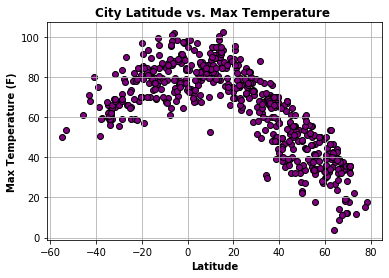

In [20]:
x_value = clean_city_data['Lat']
y_value = clean_city_data['Max Temp']
plt.scatter(x_value,y_value,marker="o", facecolors="purple", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("City Latitude vs. Max Temperature ",fontsize=12, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Max Temperature (F)", weight="bold")
plt.savefig("01_Latitude vs. Temperature Plot.png")
print("The code analyzes the relationships between max temperature and latitudes.")

## Latitude vs. Humidity Plot

The code analyzes the relationships between humidity and latitudes.


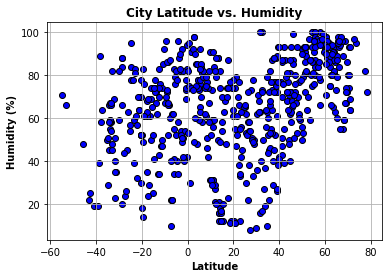

In [21]:
x_value = clean_city_data['Lat']
y_value = clean_city_data['Humidity']
plt.scatter(x_value,y_value,marker="o", facecolors="blue", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(0,105)
plt.title("City Latitude vs. Humidity",fontsize=12, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Humidity (%)", weight="bold")
plt.savefig("02_Latitude vs. Humidity Plot.png")
print("The code analyzes the relationships between humidity and latitudes.")

## Latitude vs. Cloudiness Plot

The code analyzes the relationships between cloudiness and latitudes.


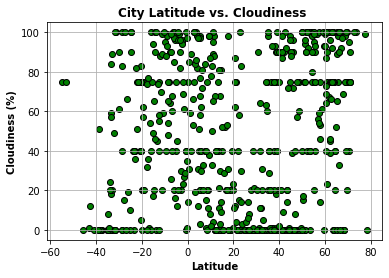

In [22]:
x_value = clean_city_data['Lat']
y_value = clean_city_data['Cloudiness']
plt.scatter(x_value,y_value,marker="o", facecolors="green", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-10,105)
plt.title("City Latitude vs. Cloudiness ",fontsize=12, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Cloudiness (%)", weight="bold")
plt.savefig("03_Latitude vs. Cloudiness Plot.png")
print("The code analyzes the relationships between cloudiness and latitudes.")

## Latitude vs. Wind Speed Plot

The code analyzes the relationships between wind speed and latitudes.


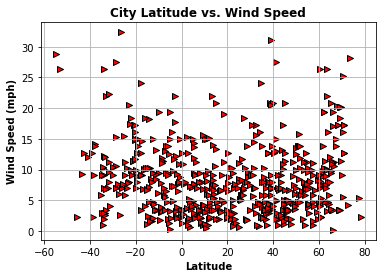

In [23]:
x_value = clean_city_data['Lat']
y_value = clean_city_data['Wind Speed']
plt.scatter(x_value,y_value,marker=">", facecolors="red", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(0,50)
plt.title("City Latitude vs. Wind Speed",fontsize=12, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Wind Speed (mph)", weight="bold")
plt.savefig("04_Latitude vs. Wind Speed Plot.png")
print("The code analyzes the relationships between wind speed and latitudes.")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7752160778932761.


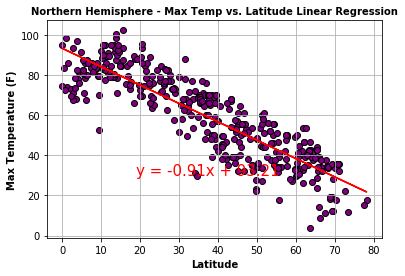

In [24]:
north_df = clean_city_data.loc[clean_city_data["Lat"] >= 0, :]

x_value = north_df['Lat']
y_value = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o", facecolors="purple", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression",fontsize=10, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Max Temperature (F)", weight="bold")
# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(19,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
plt.savefig("05_Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4165094114246192.


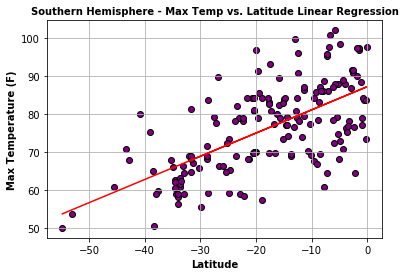

In [25]:
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0, :]

x_value = south_df['Lat']
y_value = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o", facecolors="purple", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression",fontsize=10, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Max Temperature (F)", weight="bold")
# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
plt.savefig("06_Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15643872965472522.


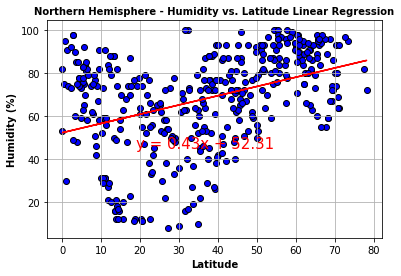

In [26]:
north_df = clean_city_data.loc[clean_city_data["Lat"] >= 0, :]

x_value = north_df['Lat']
y_value = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o", facecolors="blue", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression",fontsize=10, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Humidity (%)", weight="bold")
# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(19,45),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
plt.savefig("07_Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.036535938726458474.


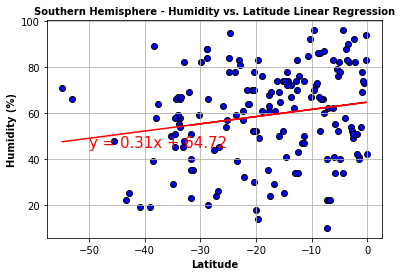

In [27]:
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0, :]

x_value = south_df['Lat']
y_value = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o", facecolors="blue", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression",fontsize=10, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Humidity (%)", weight="bold")
# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
plt.savefig("08_Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05719398119525328.


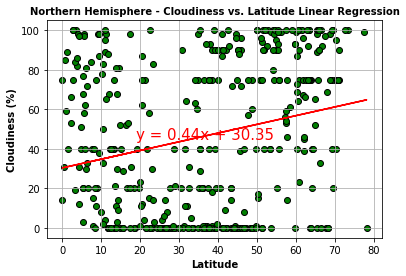

In [28]:
north_df = clean_city_data.loc[clean_city_data["Lat"] >= 0, :]

x_value = north_df['Lat']
y_value = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o", facecolors="green", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression",fontsize=10, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Cloudiness (%)", weight="bold")
# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(19,45),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
plt.savefig("09_Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.131773634987154.


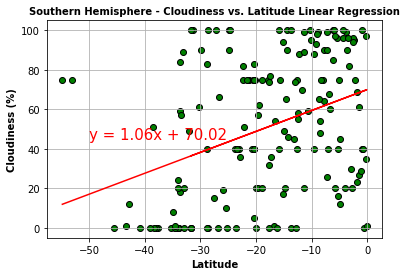

In [29]:
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0, :]

x_value = south_df['Lat']
y_value = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o", facecolors="green", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression",fontsize=10, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Cloudiness (%)", weight="bold")
# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
plt.savefig("10_Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05398977751427361.


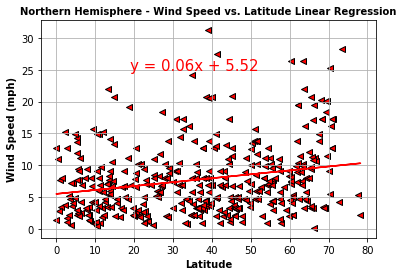

In [30]:
north_df = clean_city_data.loc[clean_city_data["Lat"] >= 0, :]

x_value = north_df['Lat']
y_value = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="<", facecolors="red", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression",fontsize=10, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Wind Speed (mph)", weight="bold")
# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(19,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
plt.savefig("11_Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05218708232248891.


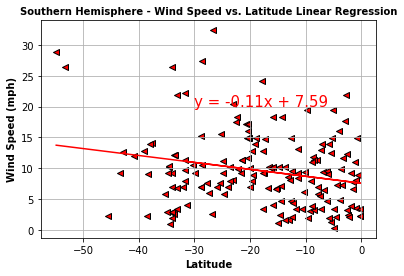

In [31]:
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0, :]

x_value = south_df['Lat']
y_value = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="<", facecolors="red", edgecolors="black")
plt.grid()
#plt.xlim(-62,82)
#plt.ylim(-20,100)
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression",fontsize=10, weight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Wind Speed (mph)", weight="bold")
# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
plt.savefig("12_Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")